## Simple regression based on algebraic derivation using RSS for cost function

In [56]:
import numpy as np
import matplotlib.pyplot as plt
import math

%matplotlib notebook

def regr(xl, yl):
    
    x = np.asarray(xl)
    y = np.asarray(yl)
    
    N = len(x)
    if N != len(y):
        print('Dimensions of x and y do not match')
        return -1
    
    w = [(sum(x**2)*sum(y)-sum(x)*sum(x*y))/(N*sum(x**2)-(sum(x))**2), 
         (N*sum(x*y) - sum(x)*sum(y))/(N*sum(x**2)-(sum(x))**2)]
    RSS = sum((y-w[0]-w[1]*x)**2)
    err = math.sqrt(RSS)/N
    
    fig, ax = plt.subplots()
    line, = ax.plot(x, y, color = 'r', marker = 'o', linestyle = ' ')
    lineFit, = ax.plot(x, w[0]+x*w[1], color = 'b')
    plt.show()
    
    return w, RSS, err

In [57]:
x = [1,2,3,4,5,6,7,8,9,10]
y = [1,2,3,4,5,6,7,8,9,10]

<IPython.core.display.Javascript object>


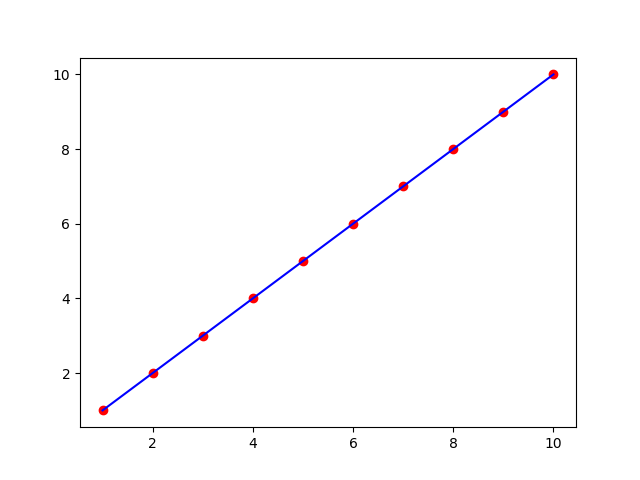

([0.0, 1.0], 0.0, 0.0)

In [58]:
regr(x,y)

In [59]:
x = np.arange(0,10,1)

In [65]:
y = 2*x + 2 + (np.random.random(size = len(x))-0.5)

<IPython.core.display.Javascript object>


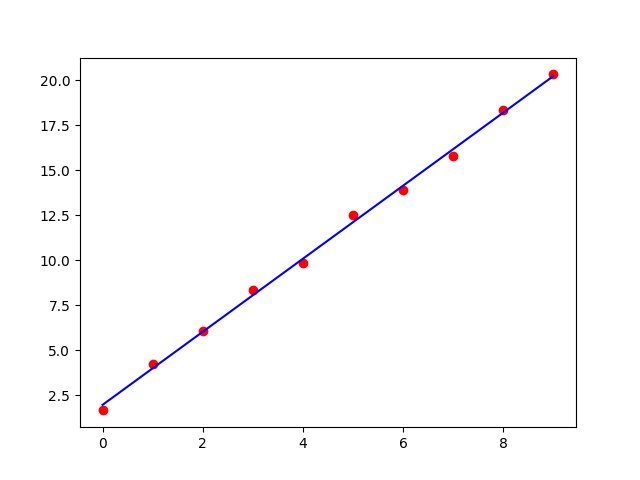

([1.971595133949013, 2.0283770630062548],
 0.67487241936474318,
 0.08215061894865694)

In [66]:
regr(x,y)

In [62]:
y

array([  2.43171627,   4.50931568,   6.72969822,   8.27189561,
        10.66176603,  12.66864846,  14.95708156,  16.38160455,
        18.1628312 ,  20.15131927])

In [67]:
x2 = np.arange(-10,10,1)

In [75]:
y2 = 3*x2+32+5*(np.random.random(size = len(x2))-0.5)

<IPython.core.display.Javascript object>


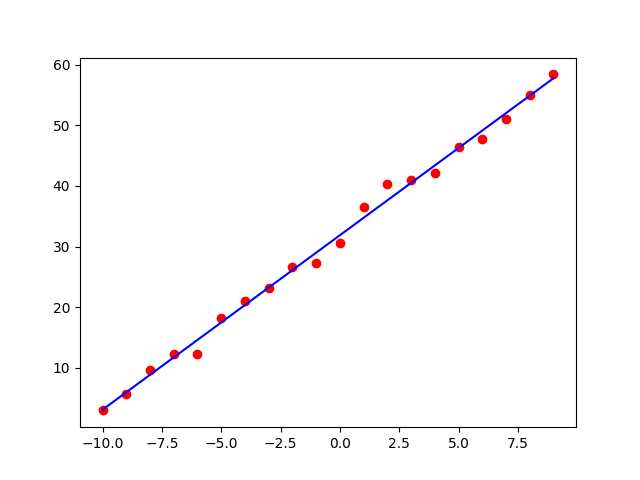

([31.87709164383762, 2.8765743456131729],
 26.702187673805476,
 0.2583707978555504)

In [76]:
regr(x2,y2)

## Less simple regression using matrix derivation using RSS for cost function

In [93]:
np.ones(len(x2))

array([ 1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.])

In [84]:
x2**2

array([100,  81,  64,  49,  36,  25,  16,   9,   4,   1,   0,   1,   4,
         9,  16,  25,  36,  49,  64,  81])

In [85]:
x2**3

array([-1000,  -729,  -512,  -343,  -216,  -125,   -64,   -27,    -8,
          -1,     0,     1,     8,    27,    64,   125,   216,   343,
         512,   729])

In [96]:
order = 2
dummy = np.ones(len(x2))
for i in range(order):
    dummy = np.vstack((dummy,x2**(i+1)))
print(dummy)

[[   1.    1.    1.    1.    1.    1.    1.    1.    1.    1.    1.    1.
     1.    1.    1.    1.    1.    1.    1.    1.]
 [ -10.   -9.   -8.   -7.   -6.   -5.   -4.   -3.   -2.   -1.    0.    1.
     2.    3.    4.    5.    6.    7.    8.    9.]
 [ 100.   81.   64.   49.   36.   25.   16.    9.    4.    1.    0.    1.
     4.    9.   16.   25.   36.   49.   64.   81.]]


In [121]:
dummy.transpose()

array([[   1.,  -10.,  100.],
       [   1.,   -9.,   81.],
       [   1.,   -8.,   64.],
       [   1.,   -7.,   49.],
       [   1.,   -6.,   36.],
       [   1.,   -5.,   25.],
       [   1.,   -4.,   16.],
       [   1.,   -3.,    9.],
       [   1.,   -2.,    4.],
       [   1.,   -1.,    1.],
       [   1.,    0.,    0.],
       [   1.,    1.,    1.],
       [   1.,    2.,    4.],
       [   1.,    3.,    9.],
       [   1.,    4.,   16.],
       [   1.,    5.,   25.],
       [   1.,    6.,   36.],
       [   1.,    7.,   49.],
       [   1.,    8.,   64.],
       [   1.,    9.,   81.]])

In [99]:
np.dot(dummy,dummy.transpose())

array([[  2.00000000e+01,  -1.00000000e+01,   6.70000000e+02],
       [ -1.00000000e+01,   6.70000000e+02,  -1.00000000e+03],
       [  6.70000000e+02,  -1.00000000e+03,   4.06660000e+04]])

In [100]:
np.linalg.inv(np.dot(dummy, dummy.transpose()))

array([[  1.12406015e-01,  -1.12781955e-03,  -1.87969925e-03],
       [ -1.12781955e-03,   1.56071998e-03,   5.69605833e-05],
       [ -1.87969925e-03,   5.69605833e-05,   5.69605833e-05]])

In [101]:
np.dot(np.linalg.inv(np.dot(dummy, dummy.transpose())),dummy)

array([[-0.06428571, -0.02969925,  0.00112782,  0.02819549,  0.05150376,
         0.07105263,  0.08684211,  0.09887218,  0.10714286,  0.11165414,
         0.11240602,  0.1093985 ,  0.10263158,  0.09210526,  0.07781955,
         0.05977444,  0.03796992,  0.01240602, -0.01691729, -0.05      ],
       [-0.01103896, -0.01056049, -0.0099681 , -0.00926179, -0.00844156,
        -0.0075074 , -0.00645933, -0.00529733, -0.00402142, -0.00263158,
        -0.00112782,  0.00048986,  0.00222146,  0.00406699,  0.00602643,
         0.00809979,  0.01028708,  0.01258829,  0.01500342,  0.01753247],
       [ 0.00324675,  0.00222146,  0.00131009,  0.00051265, -0.00017088,
        -0.00074049, -0.00119617, -0.00153794, -0.00176578, -0.0018797 ,
        -0.0018797 , -0.00176578, -0.00153794, -0.00119617, -0.00074049,
        -0.00017088,  0.00051265,  0.00131009,  0.00222146,  0.00324675]])

In [104]:
w = np.dot(np.dot(np.linalg.inv(np.dot(dummy, dummy.transpose())),dummy),y2.transpose())

In [106]:
np.dot(dummy.transpose(),w)

array([  2.94474051,   5.87392781,   8.79726922,  11.71476475,
        14.6264144 ,  17.53221816,  20.43217604,  23.32628803,
        26.21455414,  29.09697437,  31.97354872,  34.84427718,
        37.70915976,  40.56819645,  43.42138727,  46.2687322 ,
        49.11023124,  51.94588441,  54.77569169,  57.59965308])

In [107]:
y2

array([  2.99671805,   5.64047606,   9.6392222 ,  12.22052872,
        12.32686141,  18.16941589,  21.09342473,  23.23220515,
        26.63378579,  27.35809833,  30.6614818 ,  36.47720994,
        40.32707979,  41.06256169,  42.21208079,  46.4268654 ,
        47.80478613,  51.05147832,  55.03998178,  58.40182744])

In [114]:
import numpy as np
import matplotlib.pyplot as plt
import math

%matplotlib notebook

def expandX(x, order):
    dummy = np.ones(len(x))
    for i in range(order):
        dummy = np.vstack((dummy,x**(i+1)))
    return dummy

def regr2(xl, yl, order = 1, plotting = True):
    
    x = np.asarray(xl)
    y = np.asarray(yl)

    N = len(x)
    if N != len(y):
        print('Dimensions of x and y do not match')
        return -1   

    fullX = expandX(x, order)
    
    w = np.dot(np.dot(np.linalg.inv(np.dot(fullX, fullX.transpose())),fullX),y.transpose()) 

    RSS = sum((y-np.dot(fullX.transpose(),w))**2)
    err = math.sqrt(RSS)/N
    
    if plotting:
        fig, ax = plt.subplots()
        line, = ax.plot(x, y, color = 'r', marker = 'o', linestyle = ' ')
        lineFit, = ax.plot(x, np.dot(fullX.transpose(),w), color = 'b')
        plt.show()
    
    return w, RSS, err

<IPython.core.display.Javascript object>


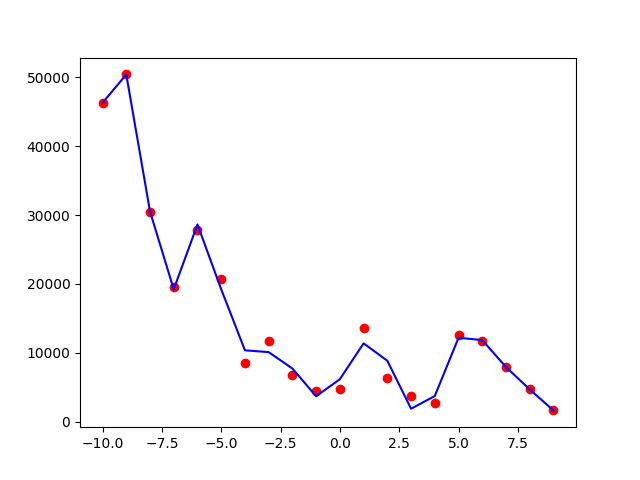

(array([  6.16289058e+03,   5.74909527e+03,   1.75857489e+03,
         -2.12709047e+03,  -4.32226812e+02,   2.32767325e+02,
          3.60688988e+01,  -1.18585909e+01,  -1.30439382e+00,
          3.14000111e-01,   2.31871594e-02,  -4.42607936e-03,
         -2.00175986e-04,   3.12413525e-05,   6.72368505e-07,
         -8.60515208e-08]), 28253174.857595921, 265.7685781727964)

In [135]:
x3 = x2
y3 = x2**4-10*x2**3+100*x2**2-1000*x2+1e4+2e4*(np.random.random(size=len(x2))-0.5)
regr2(x3,y3, order = 15, plotting = True)

### Scanning through different orders 

In [136]:
orders = np.arange(1,15,1)
errors = np.zeros(len(orders))
rss = np.zeros(len(orders))

for i in orders:
    beta, rss[i-1], errors[i-1] = regr2(x3,y3,order = i,plotting=False)

In [137]:
rss

array([  1.50749438e+09,   6.22632759e+08,   4.01215651e+08,
         3.73345065e+08,   3.73100116e+08,   3.66367460e+08,
         3.56306431e+08,   3.49689346e+08,   1.95685128e+08,
         1.48537325e+08,   1.44824403e+08,   1.32186825e+08,
         1.24066931e+08,   3.25276466e+07])

In [138]:
errors

array([ 1941.32324947,  1247.63051295,  1001.51841092,   966.10696265,
         965.78998294,   957.03638872,   943.80404565,   934.999126  ,
         699.43750253,   609.37944933,   601.71505543,   574.86264739,
         556.92668154,   285.16506877])

<IPython.core.display.Javascript object>


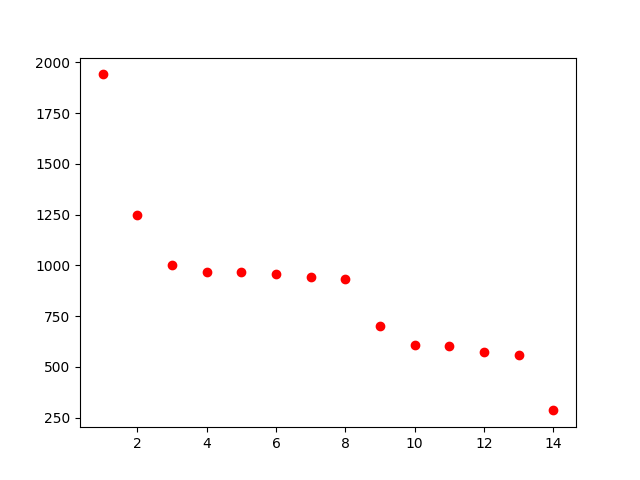

In [139]:
fig2, bx = plt.subplots()
line, = bx.plot(orders, errors, color = 'r', marker = 'o', linestyle = ' ')
plt.show()

### Test with training/test data - plot in-sample error vs fit order and out-of-sample error vs fit order

In [147]:
# virtual data set
x4 = np.arange(-10,10.1,0.1)
y4 = x4**4-2*x4**3+100*x4**2-1000*x4+1e4+2e4*(np.random.random(size=len(x4))-0.5)

In [149]:
#shift x4 randomly
x4 = x4 + (np.random.random(size=len(x4))-0.5)/0.25

<IPython.core.display.Javascript object>


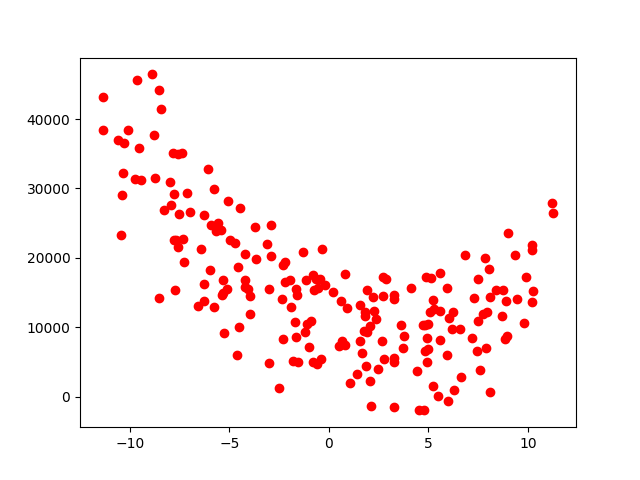

In [150]:
fig2, cx = plt.subplots()
line, = cx.plot(x4,y4, color = 'r', marker = 'o', linestyle = ' ')
plt.show()

In [151]:
len(x4)

201

In [154]:
# break into training and test sets
indices = np.random.permutation(len(x4))
training_idx, test_idx = indices[:160], indices[160:]
xTrain, xTest = x4[training_idx], x4[test_idx]
yTrain, yTest = y4[training_idx], y4[test_idx]

In [ ]:
# Calc regression coefficients from training set


In [155]:
# calc out of sample error for the various orders

def oosError(x, y, beta):

    RSS = sum((y-np.dot(x.tranpose(),beta))**2)
    error = math.sqrt(RSS)/len(y)

    return error



In [ ]:
# plot oos error and training set error vs order

